#### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import sympy as sp
import statsmodels.api as sm

In [2]:
n = 10*(5+9)-5*9
n

95

In [7]:
data = pd.read_csv(r"C:\Users\archi\OneDrive\Desktop\VU\My VU\P1\Stoch Proc\SP500 (1).csv", parse_dates = True)
data['DATE'] = pd.to_datetime(data['DATE'], format = "%d-%m-%Y")
data = data.set_index("DATE")
data = data.sort_index(ascending = False)
data = data[:n]

In [11]:
returns = data['SP500'].pct_change(-1)

In [13]:
mean = returns.dropna().mean()
std_dev = returns.dropna().std()

In [15]:
print("Mean:", np.round(mean,3))
print("Std Dev:", np.round(std_dev,5))

Mean: 0.012
Std Dev: 0.0466


## Part a)

In [21]:
Y = returns.dropna()
X = pd.Series(mean, index=range(len(Y)))
X.index = Y.index
model = sm.OLS(Y,X)
results = model.fit()

In [23]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  SP500   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 20 Sep 2024   Prob (F-statistic):                nan
Time:                        17:54:21   Log-Likelihood:                 155.34
No. Observations:                  94   AIC:                            -308.7
Df Residuals:                      93   BIC:                            -306.1
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0000      0.417      2.399      0.0

## Part b)

In [18]:
# Confidence interval for mu is given as [0.035,0.045]
# Given --- mu = 0.04 and sigma = 0.06

In [25]:
mu = 0.004
sigma = 0.06
z = 1.96 # 95% confidence interval
N = ((sigma*z)/(0.0045 - mu))**2
print("Years of Data required: ", N/12)

Years of Data required:  4609.920000000007


#### This is because the confidence interval for 95% significance is very near to the mean or narrow

## Part c)

In [27]:
mu = 0.004
sigma = 0.06
n = N
e = np.random.normal(mu, sigma, int(np.round(n,0)))
d = sigma*e + mu

In [26]:
Y = d
X = pd.Series(mu, index=range(len(Y)))
model = sm.OLS(Y,X)
results = model.fit()

In [29]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  SP500   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 20 Sep 2024   Prob (F-statistic):                nan
Time:                        17:55:55   Log-Likelihood:                 155.34
No. Observations:                  94   AIC:                            -308.7
Df Residuals:                      93   BIC:                            -306.1
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0000      0.417      2.399      0.0

###

### Part d)

In [31]:
data_d = data.copy()
data_d['Log Ret'] = np.log(data_d/data_d.shift(-1))
data_d = data_d.dropna()

In [34]:
# We use log returns because this model assumes continuous compounded returns

In [33]:
print("Mu:", np.round(data_d['Log Ret'].mean(),3))
print("Sigma:", np.round(data_d['Log Ret'].std(),3))

Mu: 0.01
Sigma: 0.047


###

### Part e)
#### The expected value after derivation will look like

$$
E[S_{60}] = S_{0} \cdot \exp\left(60 \cdot \left( \tilde{\mu} - \frac{1}{2} \tilde{\sigma}^2 \right)\right)
$$


In [39]:
S_0 = data_d['SP500'].iloc[0]
Exp_v = S_0 * np.exp(60 * (data_d['Log Ret'].mean() - 0.5 * (data_d['Log Ret'].std() ** 2)))
print("Expected value of S&P-500 after 5 years(60 months):", np.round(Exp_v, 2))

Expected value of S&P-500 after 5 years(60 months): 9869.28


In [ ]:
# check moments of normal and log normal dist

### Part  f)

## Part 2

### Constructing Binomial Tree

#### Calculating u and d using the Expected value and Variance equation

Expected value equation:
$$
0.56 \cdot r_u + 0.44 \cdot r_d = 0.006
$$

Variance Equation:
$$
0.56 \cdot (r_u - 0.006)^2 + 0.44 \cdot (r_d - 0.006)^2 = V
$$

In [3]:
def calculate_u_d(steps):
    
    r_u, r_d = sp.symbols('r_u r_d')
    
    # Monthly expected return and variance
    monthly_return = 0.006
    monthly_variance = 0.047**2
    
    # Adjust return and variance based on steps
    adjusted_return = monthly_return * (3 / steps)
    adjusted_variance = monthly_variance * (3 / steps)
    
    # Define the two equations
    expected_return_eq = 0.56 * r_u + 0.44 * r_d - adjusted_return  # Expected return equation
    variance_eq = 0.56 * (r_u - adjusted_return)**2 + 0.44 * (r_d - adjusted_return)**2 - adjusted_variance  # Variance equation
    
    # Solve the system of equations
    solution_discrete = sp.solve([expected_return_eq, variance_eq], (r_u, r_d))
    
    # Calculate u and d from the returns
    u_1 = np.round(float(1 + solution_discrete[0][0]), 5)  # First set (u and d)
    d_1 = np.round(float(1 + solution_discrete[0][1]), 5)
    
    return u_1, d_1

u_1, d_1 = calculate_u_d(3)
print("u:", u_1)
print("d:", d_1)

u: 1.04766
d: 0.95298


In [5]:
r_u, r_d = sp.symbols('r_u r_d')

# Given variance (V) based on the provided standard deviation
variance = 0.047**2

# Define the two equations
expected_return_eq = 0.56 * r_u + 0.44 * r_d - 0.006  # Expected return equation
variance_eq = 0.56 * (r_u - 0.006)**2 + 0.44 * (r_d - 0.006)**2 - variance  # Variance equation

# Solve the system of equations
solution_discrete = sp.solve([expected_return_eq, variance_eq], (r_u, r_d))

solution_discrete
u = float(1 + solution_discrete[0][0])
d = float(1 + solution_discrete[0][1])

print(u)
print(d)

1.0476610472401122
0.95297684896713


#### Calculation Risk neutral probabilities

In [7]:
r = 0.04
u = u_1 
d = d_1

# Using the formulas provided for risk-neutral probabilities
R = r/12 # Risk-free rate per month

# Calculate q_u and q_d
q_u = ((1 + R) - d) / (u - d)
q_d = (u - (1 + R)) / (u - d)

q_u, q_d


(0.5318265033093934, 0.4681734966906066)

##### We will assume So as price of 31st August 2024 which is 5648

#### Part a)

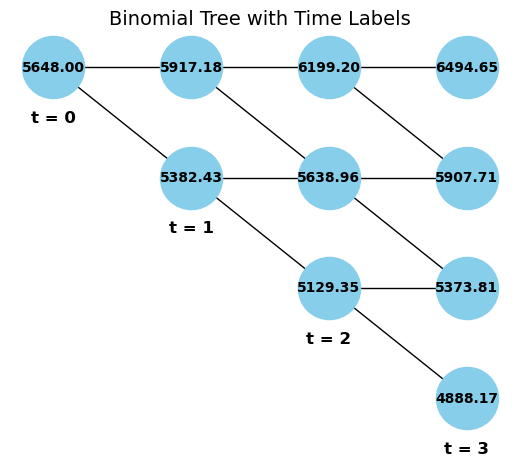

Stock Price Binomial Tree:
[[5648.         5917.18368    6199.19665419 6494.65036673]
 [   0.         5382.43104    5638.95770337 5907.71042751]
 [   0.            0.         5129.3491325  5373.81391215]
 [   0.            0.            0.         4888.16713629]]


In [61]:
# Visualization function
def visualize_binomial_tree(stock_tree, time_labels):
    G = nx.DiGraph()
    
    # Create edges with labels
    for i in range(stock_tree.shape[1]):
        for j in range(i + 1):
            G.add_node(f'{i},{j}', label=f'{stock_tree[j, i]:.2f}')
            if i < stock_tree.shape[1] - 1:
                G.add_edge(f'{i},{j}', f'{i+1},{j}', weight='U')  # Up move
                G.add_edge(f'{i},{j}', f'{i+1},{j+1}', weight='D')  # Down move
    
    # Create positions for the nodes
    pos = {}
    for i in range(stock_tree.shape[1]):
        for j in range(i + 1):
            pos[f'{i},{j}'] = (i, -j)  # Layout the nodes in a triangular pattern
    
    labels = nx.get_node_attributes(G, 'label')
    
    # Draw the graph
    plt.figure(figsize=(5, 4))
    nx.draw(G, pos, labels=labels, with_labels=True, node_size=2000, node_color='skyblue', font_size=10, font_weight='bold', arrows=False)
    
    # Add time labels
    for i in range(stock_tree.shape[1]):
        plt.text(i, -i - 0.5, f't = {time_labels[i]}', horizontalalignment='center', fontsize=12, fontweight='bold')
    
    plt.title("Binomial Tree with Time Labels", size=14)
    plt.show()

# Function to generate binomial tree using the calculated u and d values
def generate_binomial_tree(S0, u, d, N, output = "graph"):
    
    # Initialize the binomial tree
    stock_tree = np.zeros((N + 1, N + 1))
    
    # Fill the tree with stock prices
    for i in range(N + 1):
        for j in range(i + 1):
            stock_tree[j, i] = S0 * (u ** (i - j)) * (d ** j)
    
    # Output options
    if output == "graph" or output == "both":
        visualize_binomial_tree(stock_tree, [i for i in range(N + 1)])
    
    if output == "tree" or output == "both":
        print("Stock Price Binomial Tree:")
        print(stock_tree)

# Example input values
S0 = 5648  # Initial S&P-500 index level
u = u_1 # Calculated upward factor
d = d_1  # Calculated downward factor
N = 3  # Number of time steps (3 months)

# Generate and visualize the binomial tree
generate_binomial_tree(S0, u, d, N, output="both")


### Part b)

#### 3 month Call Option Price

In [63]:
# Parameters
S0 = 5648 
K = 5600  
r = 0.04  
N = 3  # Number of steps
u, d = calculate_u_d(3)

R = (r*0.25)/N # Monthly Rate

# Step 1: Initialize the stock price tree
stock_tree = np.zeros((N + 1, N + 1))

# Step 2: Fill the stock price tree
for i in range(N + 1):
    for j in range(i + 1):
        stock_tree[j, i] = S0 * (u ** (i - j)) * (d ** j)

# Step 3: Initialize the option price tree
option_tree = np.zeros((N + 1, N + 1))

# Step 4: Calculate the option payoff at maturity (t = N)
for j in range(N + 1):
    option_tree[j, N] = max(stock_tree[j, N] - K, 0)  # Payoff at maturity

# Step 5: Backward induction to calculate option price at earlier nodes
for i in range(N - 1, -1, -1):
    for j in range(i + 1):
        option_tree[j, i] = (q_u * option_tree[j, i + 1] + q_d * option_tree[j + 1, i + 1]) / (1 + R)

# The option price at the root of the tree (at t = 0)
option_price_at_t0 = option_tree[0, 0]
print("Price of 3-month European Call Option is", np.round(option_price_at_t0,4))


Price of 3-month European Call Option is 254.2627


In [65]:
option_tree

array([[254.26267165, 403.57922483, 617.80130535, 894.65036673],
       [  0.        ,  86.45531244, 163.10487777, 307.71042751],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ]])

In [67]:
stock_tree

array([[5648.        , 5917.18368   , 6199.19665419, 6494.65036673],
       [   0.        , 5382.43104   , 5638.95770337, 5907.71042751],
       [   0.        ,    0.        , 5129.3491325 , 5373.81391215],
       [   0.        ,    0.        ,    0.        , 4888.16713629]])

### Part c)

In [9]:
from scipy.stats import norm

def black_scholes(S0, K, r, T, sigma, option_type): # function for BSM model
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option_type == "Call":
        option_price = S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == "Put":
        option_price = K * np.exp(-r * T) * norm.cdf(-d2) - S0 * norm.cdf(-d1)
    else:
        raise ValueError("Invalid option type. Please input 'Call' or 'Put'.")
    
    return option_price

# Parameters
S0 = 5648
K = 5600 
T = 3 / 12 
r = 0.04 
sigma_monthly = 0.047
sigma_annual = sigma_monthly * np.sqrt(12)

# Calculate the Black-Scholes price
bs_call_price = black_scholes(S0, K, r, T, sigma_annual,'Call')
print(f"The Black-Scholes price of the European call option is", np.round(bs_call_price,4))


The Black-Scholes price of the European call option is 238.2395


In [71]:
print("Price of CE using Binomial Model:", np.round(option_price_at_t0,3))
print("Price of CE using BSM Model:", np.round(bs_call_price,3))

Price of CE using Binomial Model: 254.263
Price of CE using BSM Model: 238.24


### Part d)

In [73]:
def price_european_call_binomial(S0, K, r, u, d, N, q_u=None, q_d=None):
   
    #R = r * delta_t 
    R = (r*0.25)/N
    if q_u is None:  
        q_u = (1 + R - d) / (u - d)
    if q_d is None: 
        q_d = 1 - q_u

    # Initialize stock price tree
    stock_tree = np.zeros((N + 1, N + 1))

    # Fill the stock price tree
    for i in range(N + 1):
        for j in range(i + 1):
            stock_tree[j, i] = S0 * (u ** (i - j)) * (d ** j)

    # Initialize option price tree
    option_tree = np.zeros((N + 1, N + 1))

    # Calculate option payoff at maturity (t = N)
    for j in range(N + 1):
        option_tree[j, N] = max(stock_tree[j, N] - K, 0)  # Payoff at maturity

    # Backward induction to calculate option price at earlier nodes
    for i in range(N - 1, -1, -1):
        for j in range(i + 1):
            option_tree[j, i] = (q_u * option_tree[j, i + 1] + q_d * option_tree[j + 1, i + 1]) / (1 + R)

    # Return the option price at the root of the tree (at t = 0), along with stock_tree and option_tree
    option_price_at_t0 = option_tree[0, 0]
    return stock_tree, option_tree, option_price_at_t0


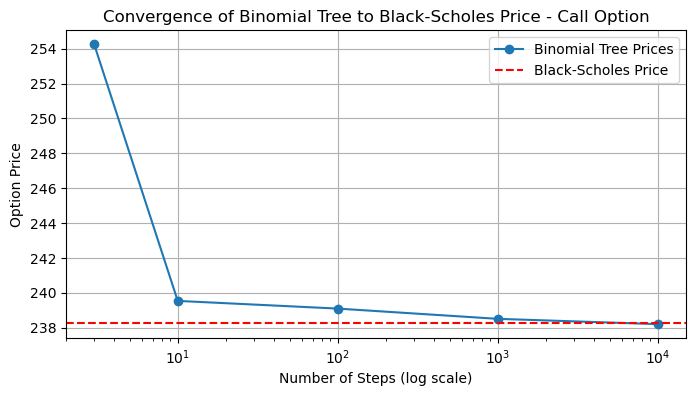

In [78]:
# Given parameters
S0 = 5648  # Initial stock price
K = 5600   # Strike price
r = 0.04   # Annual risk-free rate
T = 3 / 12  # 3 months = 0.25 years
sigma = 0.047 * np.sqrt(12)  # Annual volatility

# Calculate Black-Scholes option price
bs_option_price = black_scholes(S0, K, r, T, sigma, 'Call')

# Step sizes and binomial tree calculations
steps = [3, 10, 100, 1000, 10000]  # Number of steps to try
binomial_prices_call = []
for N in steps:
    #delta_t = T / N  # Adjust delta_t for each N steps
    u, d = calculate_u_d(N)
    stock_tree, option_tree, price = price_european_call_binomial(S0, K, r, u, d, N)
    binomial_prices_call.append(price)

# Plot the results
plt.figure(figsize=(8, 4))
plt.plot(steps, binomial_prices_call, label="Binomial Tree Prices", marker='o')
plt.axhline(y=bs_option_price, color='r', linestyle='--', label="Black-Scholes Price")
plt.xscale('log')  # Log scale for better visualization of convergence
plt.xlabel('Number of Steps (log scale)')
plt.ylabel('Option Price')
plt.title('Convergence of Binomial Tree to Black-Scholes Price - Call Option')
plt.legend()
plt.grid(True)
plt.show()

### Part e)

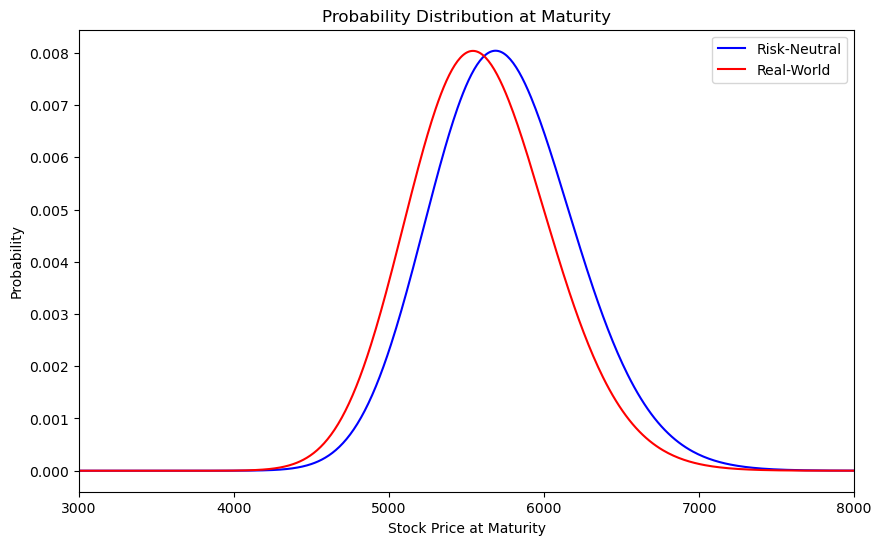

In [112]:
import numpy as np
import matplotlib.pyplot as plt
import math

def log_comb(n, k):
    """Compute the logarithm of the binomial coefficient."""
    return math.log(math.factorial(n)) - (math.log(math.factorial(k)) + math.log(math.factorial(n - k)))

def final_probabilities(S0, K, r, u, d, N, q_u=None, q_d=None):
    #R = r * delta_t 
    R = (r*0.25)/N
    if q_u is None:  
        q_u = (1 + R - d) / (u - d)
    if q_d is None: 
        q_d = 1 - q_u

    # Initialize stock price tree
    stock_tree = np.zeros((N + 1, N + 1))

    # Fill the stock price tree
    for i in range(N + 1):
        for j in range(i + 1):
            stock_tree[j, i] = S0 * (u ** (i - j)) * (d ** j)

    # Binomial probabilities for each node at maturity using log-space to prevent overflow
    probabilities = np.zeros(N + 1)
    for j in range(N + 1):
        log_prob = log_comb(N, j) + (N - j) * math.log(q_u) + j * math.log(q_d)
        probabilities[j] = math.exp(log_prob)

    # Normalize the probabilities to ensure they sum to 1 (handling numerical precision)
    probabilities /= np.sum(probabilities)
    
    return stock_tree[:, -1], probabilities

def plot_probabilities(stock_prices, probabilities_risk_neutral, probabilities_real_world):
    plt.figure(figsize=(10,6))
    plt.plot(stock_prices, probabilities_risk_neutral, color='blue', label='Risk-Neutral')
    plt.plot(stock_prices, probabilities_real_world, color='red', label='Real-World')
    plt.xlabel("Stock Price at Maturity")
    plt.ylabel("Probability")
    plt.title("Probability Distribution at Maturity")
    plt.xlim(3000, 8000)
    plt.legend()
    plt.show()

# Parameters
S0 = 5648  
K = 5600   
r = 0.04   
N = 10000  # Number of steps
u, d = calculate_u_d(N)


# Real-world probabilities can differ from risk-neutral, so assume a different q_u_real if needed
q_u_real = 0.56  # Real-world up probability
q_d_real = 1 - q_u_real

# Calculate for risk-neutral measure
stock_prices, probabilities_risk_neutral = final_probabilities(S0, K, r, u, d, N)

# Calculate for real-world measure
_, probabilities_real_world = final_probabilities(S0, K, r, u, d, N, q_u_real, q_d_real)

# Plot both probability distributions in one graph
plot_probabilities(stock_prices, probabilities_risk_neutral, probabilities_real_world)



### Part f)

In [11]:
def price_european_put_binomial(S0, K, r, u, d, N, q_u=None, q_d=None):
    # Adjust the rate R as in the call option function
    R = (r * 0.25) / N  # Discrete rate per step, adjusted for N steps
    if q_u is None:  # Risk-neutral probability for upward move
        q_u = (1 + R - d) / (u - d)
    if q_d is None:  # Risk-neutral probability for downward move
        q_d = 1 - q_u

    # Initialize stock price tree
    stock_tree = np.zeros((N + 1, N + 1))

    # Fill the stock price tree
    for i in range(N + 1):
        for j in range(i + 1):
            stock_tree[j, i] = S0 * (u ** (i - j)) * (d ** j)

    # Initialize option price tree
    option_tree = np.zeros((N + 1, N + 1))

    # Calculate put option payoff at maturity (t = N)
    for j in range(N + 1):
        option_tree[j, N] = max(K - stock_tree[j, N], 0)  # Put option payoff at maturity

    # Backward induction to calculate option price at earlier nodes
    for i in range(N - 1, -1, -1):
        for j in range(i + 1):
            option_tree[j, i] = (q_u * option_tree[j, i + 1] + q_d * option_tree[j + 1, i + 1]) / (1 + R)

    # Return the option price at the root of the tree (at t = 0), along with stock_tree and option_tree
    option_price_at_t0 = option_tree[0, 0]
    return stock_tree, option_tree, option_price_at_t0

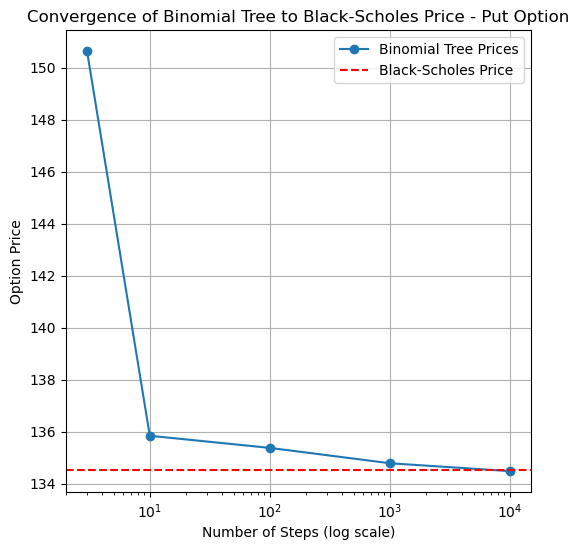

[150.63394122764305, 135.84148150725497, 135.37509754840056, 134.78485626913337, 134.48138707081378]
134.5185696934509


In [13]:
# Example usage
# Given parameters
S0 = 5648  # Initial stock price
K = 5600   # Strike price
r = 0.04   # Annual risk-free rate
T = 3 / 12  # 3 months = 0.25 years
sigma = 0.047 * np.sqrt(12)  # Annual volatility

steps =  [3, 10, 100, 1000, 10000]  # Number of steps to try

# Calculate Black-Scholes option price
bs_option_price = black_scholes(S0, K, r, T, sigma, "Put")

# Calculate binomial tree prices for different step counts
binomial_prices_put = []
for N in steps:
    u, d = calculate_u_d(N)
    stock_tree, option_tree, price = price_european_put_binomial(S0, K, r, u, d, N)
    binomial_prices_put.append(price)

# Plot the results
plt.figure(figsize=(6, 6))
plt.plot(steps, binomial_prices_put, label="Binomial Tree Prices", marker='o')
plt.axhline(y=bs_option_price, color='r', linestyle='--', label="Black-Scholes Price")
plt.xscale('log')  # Log scale for better visualization of convergence
plt.xlabel('Number of Steps (log scale)')
plt.ylabel('Option Price')
plt.title('Convergence of Binomial Tree to Black-Scholes Price - Put Option')
plt.legend()
plt.grid(True)
plt.show()

print(binomial_prices_put)
print(bs_option_price)

In [128]:
import numpy as np

# Given values
S0 = 5648  # Current stock price
K = 5600   # Strike price
r = 0.04   # Risk-free interest rate
T = 3 / 12 # Time to maturity (3 months = 0.25 years)
n = 12     # Compounding frequency (monthly compounding)

# Call and put prices (assumed to be American options, though put-call parity applies to European options)
C = np.round(binomial_prices_call[0],2) # Call option price
P = np.round(binomial_prices_put[0],2)# Put option price

# Put-Call Parity: Left-hand side (C - P)
put_call_parity_lhs = np.round(C - P,2)

# Right-hand side (S0 - K * (1 + r/n)^(-nT)) using discrete compounding
put_call_parity_rhs = np.round(S0 - K * (1 + r / n) ** (-n * T),2)

# Print the results
print(f"Left-hand side (C - P): {put_call_parity_lhs}")
print(f"Right-hand side (S0 - K * (1 + r/n)^(-nT)): {put_call_parity_rhs}")

# Check if they are approximately equal
if np.isclose(put_call_parity_lhs, put_call_parity_rhs):
    print("Put-Call Parity holds")
else:
    print("Put-Call Parity does not hold")


Left-hand side (C - P): 103.63
Right-hand side (S0 - K * (1 + r/n)^(-nT)): 103.63
Put-Call Parity holds


### Part g)

#### American Call & Put Option

In [129]:
def price_american_put_binomial(S0, K, r, u, d, N, q_u=None, q_d=None):
    # Risk-neutral probabilities using discrete compounding
    R = (r * 0.25) / N  # Discrete rate per step
    if q_u is None:  # Risk-neutral probability for upward move
        q_u = (1 + R - d) / (u - d)  
    if q_d is None:  # Risk-neutral probability for downward move
        q_d = 1 - q_u

    # Initialize stock price tree
    stock_tree = np.zeros((N + 1, N + 1))

    # Fill the stock price tree
    for i in range(N + 1):
        for j in range(i + 1):
            stock_tree[j, i] = S0 * (u ** (i - j)) * (d ** j)

    # Initialize option price tree
    option_tree = np.zeros((N + 1, N + 1))

    # Calculate put option payoff at maturity (t = N)
    for j in range(N + 1):
        option_tree[j, N] = max(K - stock_tree[j, N], 0)  # Put option payoff at maturity

    # Backward induction to calculate option price at earlier nodes, allowing for early exercise
    for i in range(N - 1, -1, -1):
        for j in range(i + 1):
            # Expected value from holding the option (as in the European case)
            hold_value = (q_u * option_tree[j, i + 1] + q_d * option_tree[j + 1, i + 1]) / (1 + R)
            # Payoff from early exercise
            exercise_value = max(K - stock_tree[j, i], 0)
            # Take the maximum of holding the option vs early exercise
            option_tree[j, i] = max(hold_value, exercise_value)

    # Return the option price at the root of the tree (at t = 0), along with stock_tree and option_tree
    option_price_at_t0 = option_tree[0, 0]
    return stock_tree, option_tree, option_price_at_t0

def price_american_call_binomial(S0, K, r, u, d, N, q_u=None, q_d=None):
    # Risk-neutral probabilities using discrete compounding
    R = (r * 0.25) / N  # Discrete rate per step
    if q_u is None:  # Risk-neutral probability for upward move
        q_u = (1 + R - d) / (u - d)  
    if q_d is None:  # Risk-neutral probability for downward move
        q_d = 1 - q_u

    # Initialize stock price tree
    stock_tree = np.zeros((N + 1, N + 1))

    # Fill the stock price tree
    for i in range(N + 1):
        for j in range(i + 1):
            stock_tree[j, i] = S0 * (u ** (i - j)) * (d ** j)

    # Initialize option price tree
    option_tree = np.zeros((N + 1, N + 1))

    # Calculate call option payoff at maturity (t = N)
    for j in range(N + 1):
        option_tree[j, N] = max(stock_tree[j, N] - K, 0)  # Call option payoff at maturity

    # Backward induction to calculate option price at earlier nodes, allowing for early exercise
    for i in range(N - 1, -1, -1):
        for j in range(i + 1):
            # Expected value from holding the option (as in the European case)
            hold_value = (q_u * option_tree[j, i + 1] + q_d * option_tree[j + 1, i + 1]) / (1 + R)
            # Payoff from early exercise
            exercise_value = max(stock_tree[j, i] - K, 0)
            # Take the maximum of holding the option vs early exercise
            option_tree[j, i] = max(hold_value, exercise_value)

    # Return the option price at the root of the tree (at t = 0), along with stock_tree and option_tree
    option_price_at_t0 = option_tree[0, 0]
    return stock_tree, option_tree, option_price_at_t0
    

In [130]:
S0 = 5648  
K = 5600  
r = 0.04  
N = 3  
u, d = calculate_u_d(N)

# Correctly calling the American call and put option functions
stock_tree, option_tree, CA_price = price_american_call_binomial(S0, K, r, u, d, N, q_u=None, q_d=None)
stock_tree, option_tree, CE_price = price_european_call_binomial(S0, K, r, u, d, N, q_u=None, q_d=None)
stock_tree, option_tree, PE_price = price_european_put_binomial(S0, K, r, u, d, N, q_u=None, q_d=None)
stock_tree, option_tree, PA_price = price_american_put_binomial(S0, K, r, u, d, N, q_u=None, q_d=None)

print("American Call Price:", CA_price)
print("European Call Price:", CE_price)
print("")
print("American Put Price:", PA_price)
print("European Put Price:", PE_price)

American Call Price: 254.2626716461956
European Call Price: 254.2626716461956

American Put Price: 154.68477758225322
European Put Price: 150.63394122764305


### Interpretation of Results:

#### Call Option Values: 
###### The prices of the American and European call options are the same, indicating that there is no advantage in exercising the call option early. This result is expected because, in a call option, early exercise before maturity is typically not beneficial, especially when interest rates are low. Therefore, the European and American call options converge in value.

#### Put Option Values: 
###### For the put options, there is a slight difference between the American and European prices. The American put option is priced slightly higher at 154.68 compared to the European put option at 150.63. This difference of about 4.05 reflects the value of having the flexibility to exercise the option early. In some cases, especially in downward-trending markets, early exercise might be favorable, particularly if the option is deep in-the-money. The small price difference indicates that while early exercise is possible, the option is likely not in a situation where early exercise provides a significant advantage in the current market conditions.

#### Conclusion:
##### The flexibility to exercise early increases the value of the American put compared to the European put, though the difference is modest in this case. This aligns with the typical scenario where American options hold slightly higher value due to the early exercise feature, especially for puts.